# 🌍 Global Air Quality Analysis
## Author: Diwan FarhanMadar
### Goal: Analyze worldwide air quality (PM2.5, PM10, CO, NO2, O3, SO2, AQI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Make sure plots are high resolution
plt.rcParams["figure.dpi"] = 130
sns.set(style="whitegrid")

# Create folder to save plots
os.makedirs("output_plots", exist_ok=True)

# Create Sample Data

In [3]:
np.random.seed(42)

cities = ["Delhi", "Beijing", "New York", "London", "Paris", "Tokyo", "Cairo", "Mexico City", "Sydney", "Moscow"]
countries = ["India", "China", "USA", "UK", "France", "Japan", "Egypt", "Mexico", "Australia", "Russia"]

# Generate data for 5 years
dates = pd.date_range("2018-01-01", "2022-12-31", freq="M")

data = []
for city, country in zip(cities, countries):
    for d in dates:
        row = {
            "city": city,
            "country": country,
            "date": d,
            "pm2_5": np.random.randint(10, 200),
            "pm10": np.random.randint(20, 300),
            "no2": np.random.randint(5, 100),
            "o3": np.random.randint(5, 120),
            "so2": np.random.randint(2, 80),
            "co": np.random.uniform(0.1, 2.0),
        }
        row["aqi"] = (row["pm2_5"] + row["pm10"]/2 + row["no2"] + row["o3"]/2 + row["so2"])/5
        data.append(row)

df = pd.DataFrame(data)
df.to_csv("data_air_quality.csv", index=False)
print("✅ Sample dataset created:", df.shape)
df.head()

✅ Sample dataset created: (600, 10)


C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\2264093647.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2018-01-01", "2022-12-31", freq="M")


,city,country,date,pm2_5,pm10,no2,o3,so2,co,aqi
0,Delhi,India,2018-01-31,112,290,76,65,22,0.396435,77.5
1,Delhi,India,2018-02-28,84,107,28,7,23,0.207182,38.4
2,Delhi,India,2018-03-31,97,211,64,25,34,0.678060,62.6
3,Delhi,India,2018-04-30,31,272,93,53,60,0.859736,69.3
4,Delhi,India,2018-05-31,197,290,66,66,48,1.274933,97.8


# Data Cleaning

In [4]:
# Load data
df = pd.read_csv("data_air_quality.csv", parse_dates=["date"])

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

df["city"] = df["city"].str.title()
df["country"] = df["country"].str.title()

print("Cleaned dataset ready:", df.shape)


Cleaned dataset ready: (600, 10)


# Feature Engineering

In [5]:
# Extract year
df["year"] = df["date"].dt.year

# Pollution categories (simplified)
def categorize_aqi(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy (Sensitive)"
    elif aqi <= 200: return "Unhealthy"
    else: return "Very Unhealthy"

df["pollution_category"] = df["aqi"].apply(categorize_aqi)

df.head()

,city,country,date,pm2_5,pm10,no2,o3,so2,co,aqi,year,pollution_category
0,Delhi,India,2018-01-31,112,290,76,65,22,0.396435,77.5,2018,Moderate
1,Delhi,India,2018-02-28,84,107,28,7,23,0.207182,38.4,2018,Good
2,Delhi,India,2018-03-31,97,211,64,25,34,0.678060,62.6,2018,Moderate
3,Delhi,India,2018-04-30,31,272,93,53,60,0.859736,69.3,2018,Moderate
4,Delhi,India,2018-05-31,197,290,66,66,48,1.274933,97.8,2018,Moderate


# Analysis
Average AQI by Country

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\3592468212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_aqi.values, y=country_aqi.index, palette="Reds_r")
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\3592468212.py:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\3592468212.py:9: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.savefig("output_plots/avg_aqi_by_country.png", dpi=300)
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


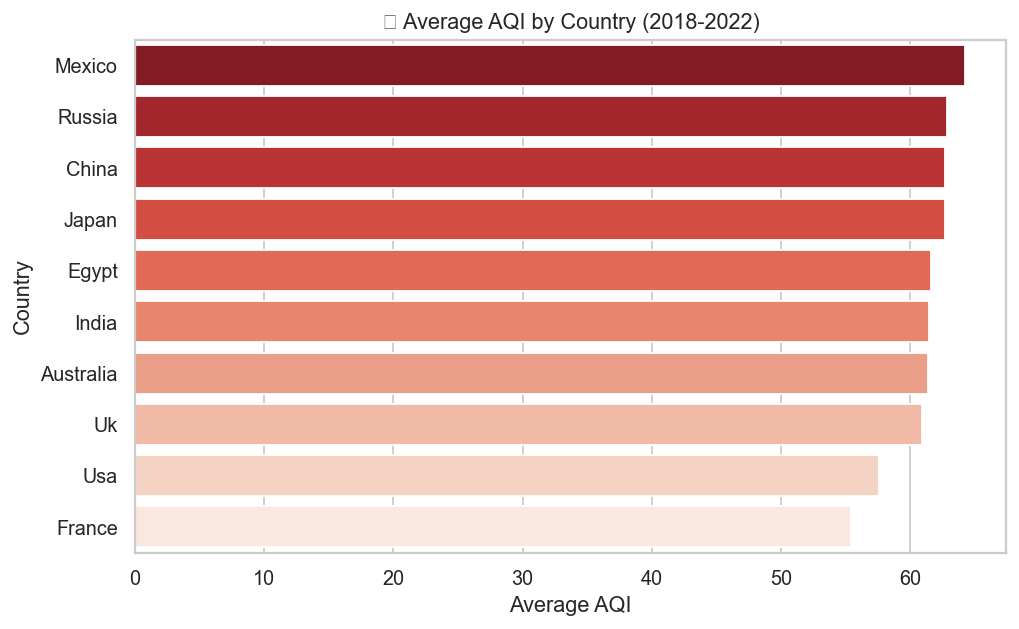

In [6]:
country_aqi = df.groupby("country")["aqi"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=country_aqi.values, y=country_aqi.index, palette="Reds_r")
plt.title("🌍 Average AQI by Country (2018-2022)")
plt.xlabel("Average AQI")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("output_plots/avg_aqi_by_country.png", dpi=300)
plt.show()

AQI Trend by Year

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1725996790.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1725996790.py:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig("output_plots/aqi_trend_over_time.png", dpi=300)
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


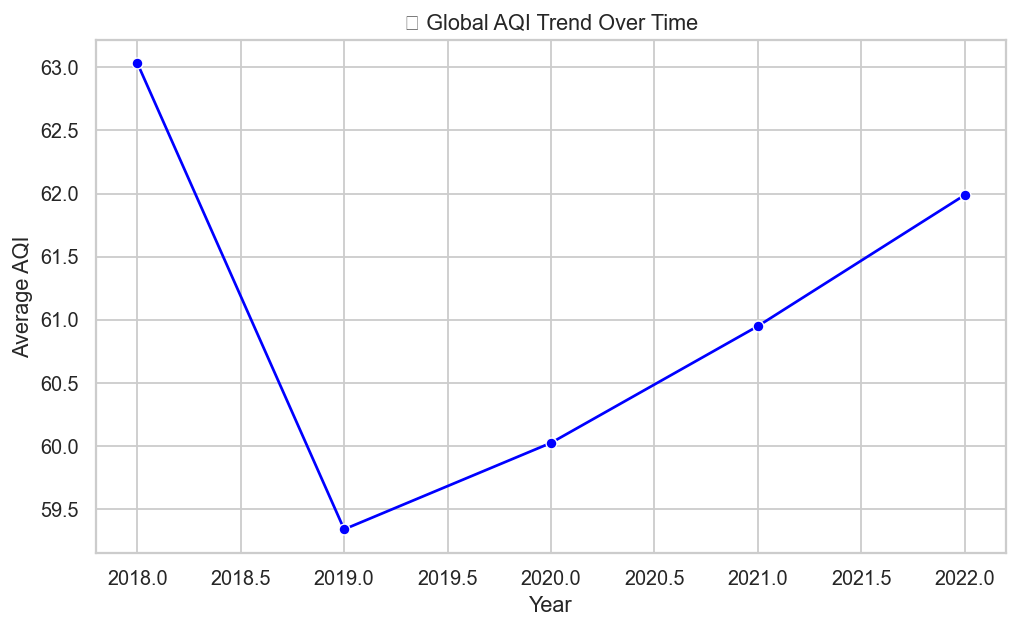

In [7]:
yearly_aqi = df.groupby("year")["aqi"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker="o", color="blue")
plt.title("📈 Global AQI Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.tight_layout()
plt.savefig("output_plots/aqi_trend_over_time.png", dpi=300)
plt.show()

- Top 10 Polluted Cities

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1785732698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.values, y=city_aqi.index, palette="Oranges_r")
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1785732698.py:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1785732698.py:8: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1785732698.py:9: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) Arial.
  plt.savefig("output_plots/top_polluted_cities.png", dpi=300)
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1785732698.py:9: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) m

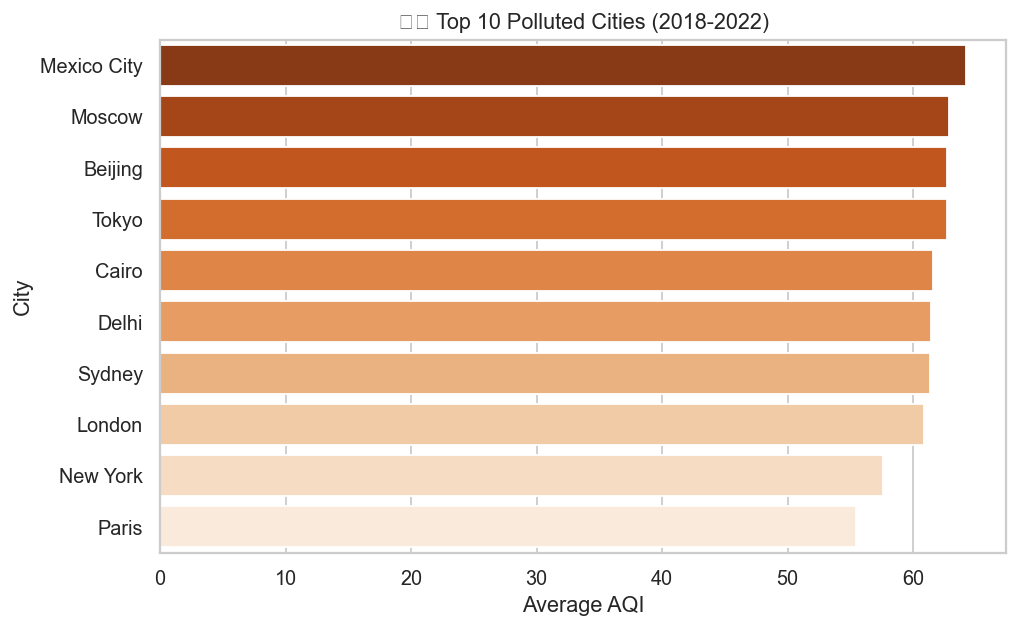

In [8]:
city_aqi = df.groupby("city")["aqi"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=city_aqi.values, y=city_aqi.index, palette="Oranges_r")
plt.title("🏙️ Top 10 Polluted Cities (2018-2022)")
plt.xlabel("Average AQI")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("output_plots/top_polluted_cities.png", dpi=300)
plt.show()

- Correlation Heatmap

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\2030754081.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\2030754081.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.savefig("output_plots/pollutant_correlation.png", dpi=300)
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


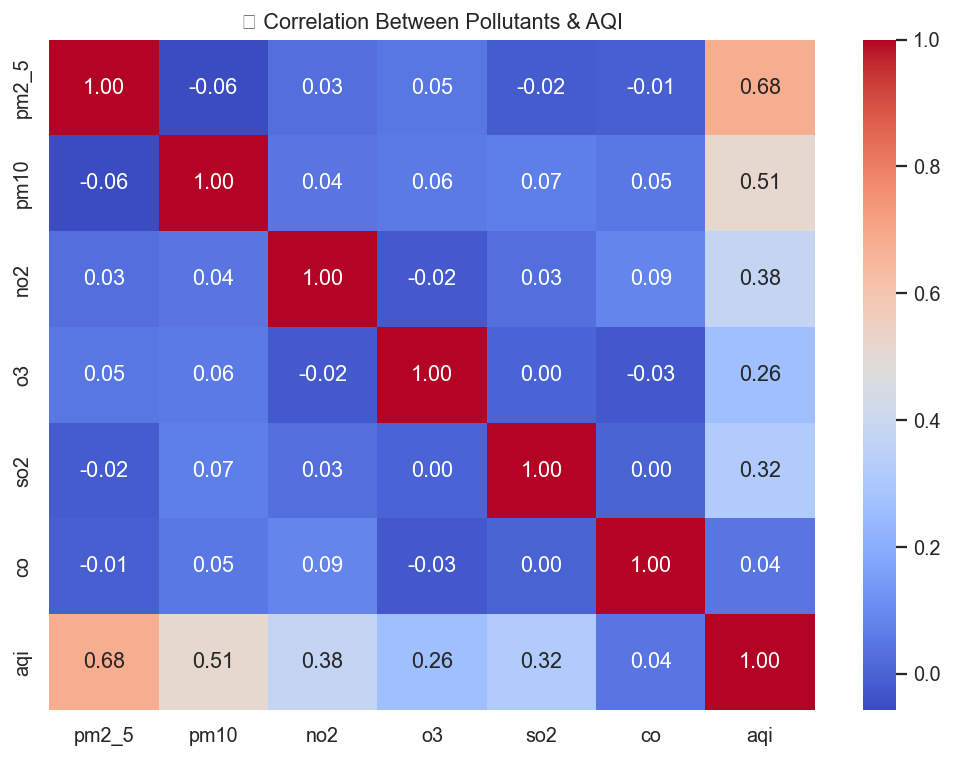

In [9]:
plt.figure(figsize=(8,6))
corr = df[["pm2_5","pm10","no2","o3","so2","co","aqi"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Between Pollutants & AQI")
plt.tight_layout()
plt.savefig("output_plots/pollutant_correlation.png", dpi=300)
plt.show()

# Merge with Population Data (Per Capita Exposure)

C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1518634821.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged.sort_values("aqi_per_capita", ascending=False),
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1518634821.py:15: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Farhan Diwan\AppData\Local\Temp\ipykernel_9640\1518634821.py:16: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.savefig("output_plots/aqi_per_capita.png", dpi=300)
C:\Users\Farhan Diwan\anaconda3\envs\Farhanenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


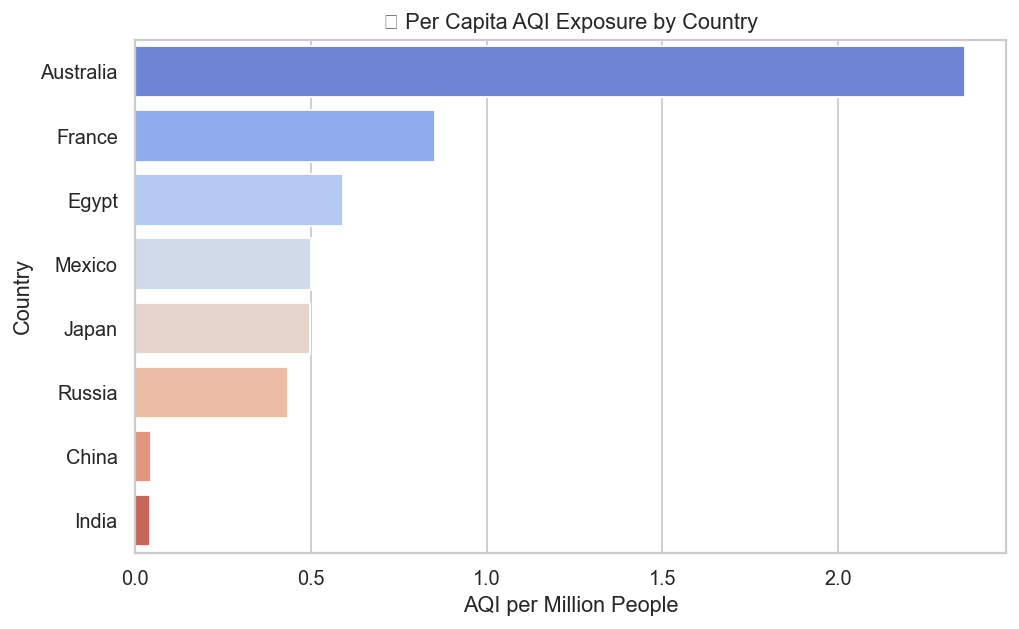

,country,aqi,population_million,aqi_per_capita
0,Australia,61.343333,26,2.359359
1,China,62.708333,1400,0.044792
2,Egypt,61.595000,104,0.592260
3,France,55.435000,65,0.852846
4,India,61.413333,1400,0.043867
5,Japan,62.688333,126,0.497526
6,Mexico,64.205000,128,0.501602
7,Russia,62.826667,144,0.436296


In [10]:
population = pd.DataFrame({
    "country": countries,
    "population_million": [1400, 1400, 330, 67, 65, 126, 104, 128, 26, 144]
})

merged = df.groupby("country")["aqi"].mean().reset_index().merge(population, on="country")
merged["aqi_per_capita"] = merged["aqi"] / merged["population_million"]

plt.figure(figsize=(8,5))
sns.barplot(data=merged.sort_values("aqi_per_capita", ascending=False),
            x="aqi_per_capita", y="country", palette="coolwarm")
plt.title("👥 Per Capita AQI Exposure by Country")
plt.xlabel("AQI per Million People")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("output_plots/aqi_per_capita.png", dpi=300)
plt.show()

merged


# Outcome

- Cleaned & transformed dataset
- Country & city-level AQI insights
- Pollution trends (2018–2022)
- Correlation heatmap between pollutants
- Per capita exposure visualization
- Policy-level insights: countries with high AQI per capita need urgent action